In [48]:
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
!ls ../data

aug_nw				       yearly_24_train_nw.pkl
yearly_18_scales_test.pkl	       yearly_24_train.pkl
yearly_18_scales_train.pkl	       yearly_24_validation_nw.pkl
yearly_18_train_aug.pkl		       yearly_24_validation.pkl
yearly_18_train.pkl		       yearly_30_scales_test.pkl
yearly_18_validation.pkl	       yearly_30_scales_train.pkl
yearly_24_aug_by_2_num_23000000_nw.h5  yearly_30_train_aug.pkl
yearly_24_aug_by_2_num_2300000_nw.h5   yearly_30_train.pkl
yearly_24_aug_by_2_num_230000_nw.h5    yearly_30_validation.pkl
yearly_24_aug_by_2_num_23000_nw.h5     yearly_36_scales_test.pkl
yearly_24_nw.h5			       yearly_36_scales_train.pkl
yearly_24_scales_nw.pkl		       yearly_36_train_aug.pkl
yearly_24_scales_test_nw.pkl	       yearly_36_train.pkl
yearly_24_scales_test.pkl	       yearly_36_validation.pkl
yearly_24_scales_train_nw.pkl	       Yearly-test.csv
yearly_24_scales_train.pkl	       Yearly-train.csv
yearly_24_train_aug.pkl


In [10]:
with h5py.File('../data/yearly_24_aug_by_2_num_23000_nw.h5', 'r') as hf:
    x = np.array(hf.get('X'))
    y = np.array(hf.get('y'))

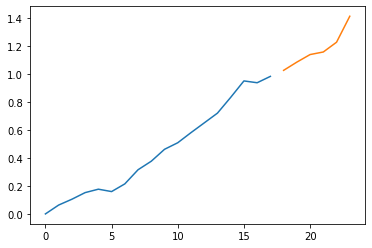

In [24]:
plt.plot(range(18), x[0])
plt.plot(range(18, 24), y[0])

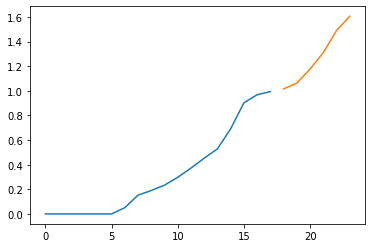

In [21]:
i = 4

plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

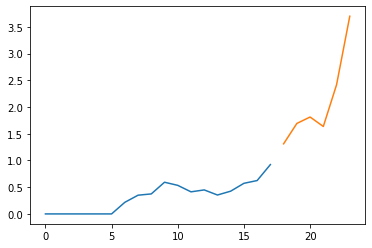

In [25]:
with h5py.File('../data/yearly_24_aug_by_2_num_230000_nw.h5', 'r') as hf:
    x = np.array(hf.get('X'))
    y = np.array(hf.get('y'))

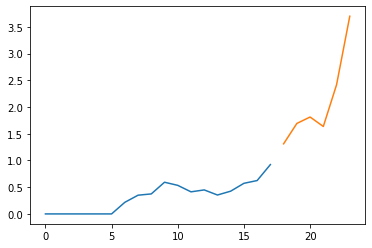

In [26]:
i = 4

plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

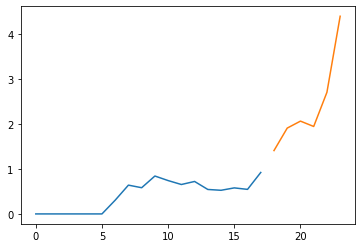

In [31]:
i = 10

plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

In [32]:
with h5py.File('../data/yearly_24_aug_by_2_num_2300000_nw.h5', 'r') as hf:
    x = np.array(hf.get('X'))
    y = np.array(hf.get('y'))

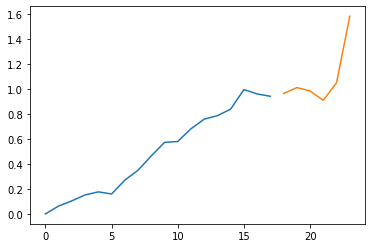

In [33]:
i = 0

plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

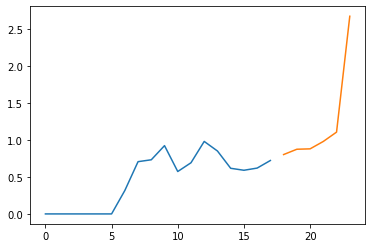

In [34]:
i = 1

plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

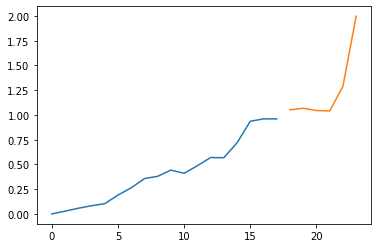

In [35]:
i = 2

plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

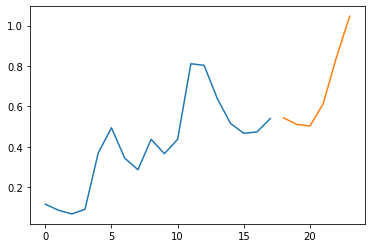

In [36]:
i = 5

plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

In [50]:
from sklearn.linear_model import LinearRegression


def get_coef(ser):
    lr = LinearRegression()
    lr.fit(np.arange(len(ser)).reshape(-1, 1), ser)
    return lr.coef_


def get_coeffs_sample(dset, end=23000):
    return [get_coef(xi) for xi in tqdm(dset[:end])]

In [52]:
x_coeffs_2m = get_coeffs_sample(x)


100%|██████████| 23000/23000 [00:07<00:00, 3123.77it/s]


In [55]:
y_coeffs_2m = get_coeffs_sample(y)

100%|██████████| 23000/23000 [00:06<00:00, 3293.69it/s]


 82%|████████▏ | 18848/23000 [00:19<00:01, 3160.78it/s]

In [56]:
with h5py.File('../data/yearly_24_aug_by_2_num_23000_nw.h5', 'r') as hf:
    x = np.array(hf.get('X'))
    y = np.array(hf.get('y'))

x_coeffs_23k = get_coeffs_sample(x)
y_coeffs_23k = get_coeffs_sample(y)

100%|██████████| 23000/23000 [00:06<00:00, 3372.25it/s]


In [57]:
with h5py.File('../data/yearly_24_aug_by_2_num_230000_nw.h5', 'r') as hf:
    x = np.array(hf.get('X'))
    y = np.array(hf.get('y'))
    
x_coeffs_230k = get_coeffs_sample(x)
y_coeffs_230k = get_coeffs_sample(y)

100%|██████████| 23000/23000 [00:06<00:00, 3332.61it/s]


/home/thanos/.envs/aug/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/thanos/.envs/aug/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/thanos/.envs/aug/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:ylabel='Density'>

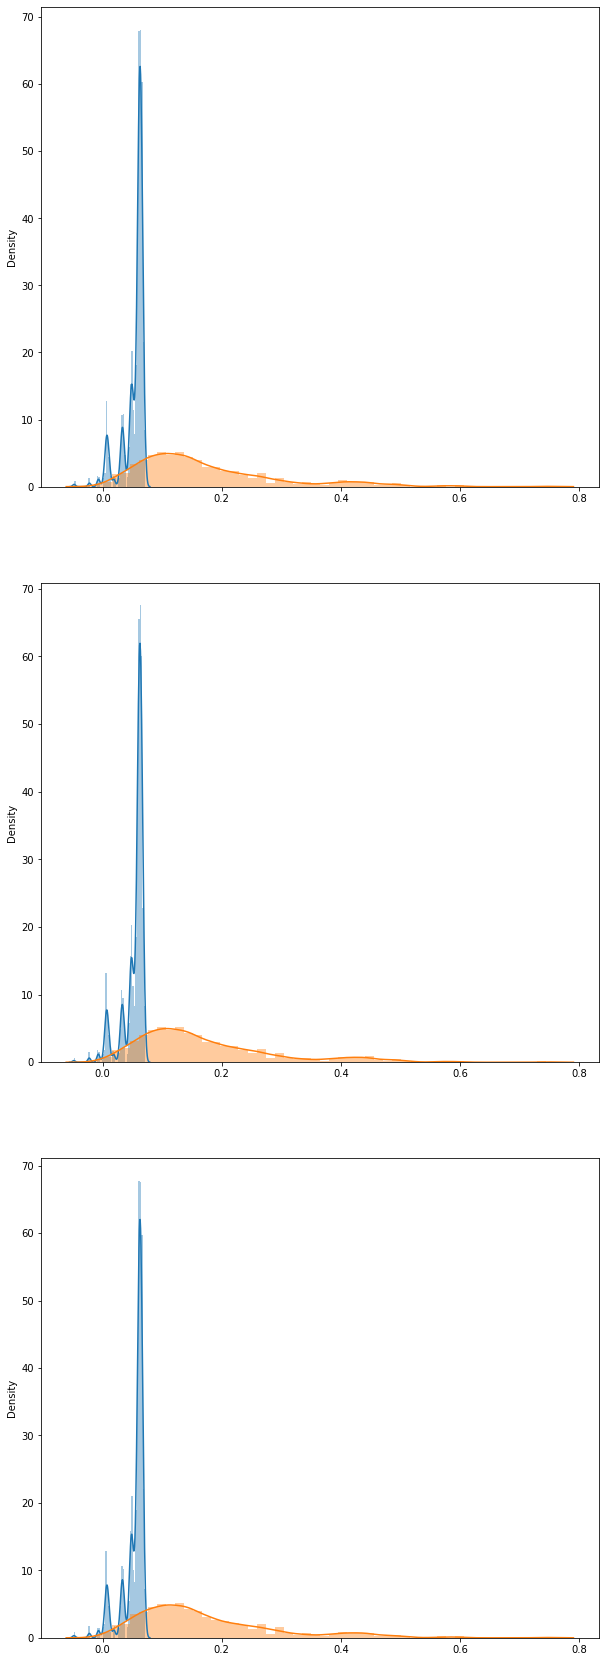

In [60]:
plt.figure(figsize=(10, 30))
ax = plt.subplot(311)
sns.distplot(x_coeffs_23k)
sns.distplot(y_coeffs_23k)

ax = plt.subplot(312)
sns.distplot(x_coeffs_230k)
sns.distplot(y_coeffs_230k)

ax = plt.subplot(313)
sns.distplot(x_coeffs_2m)
sns.distplot(y_coeffs_2m)